In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
pip install --upgrade tensorflow keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
true = pd.read_csv("true.csv")
false = pd.read_csv("fake.csv")

In [9]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [27]:
true.shape

(21417, 5)

In [12]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [14]:
false.shape

(23481, 4)

In [16]:
true['category'] = 1
false['category'] = 0
df = pd.concat([true, false])

In [18]:
df.tail()

,title,text,subject,date,category
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [20]:
df.shape

(44898, 5)

In [22]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## Clean the Data

In [27]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+', '', text)
    stop = set(stopwords.words('english'))
    punctuation = list(string.punctuation)
    stop.update(punctuation)
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip())
    cleaned_text = " ".join(final_text)

    # Check if the cleaned text is empty
    if not cleaned_text:
        cleaned_text = "placeholder"  # Add a placeholder word

    return cleaned_text

df['clean_text'] = df['text'].apply(clean_text)

In [28]:
df.head()

,title,text,subject,date,category,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,WASHINGTON (Reuters) head conservative Republi...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,WASHINGTON (Reuters) Transgender people allowe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,WASHINGTON (Reuters) special counsel investiga...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,WASHINGTON (Reuters) Trump campaign adviser Ge...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,SEATTLE/WASHINGTON (Reuters) President Donald ...


In [29]:
df.shape

(44898, 6)

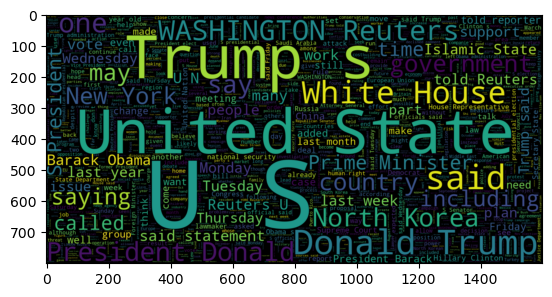

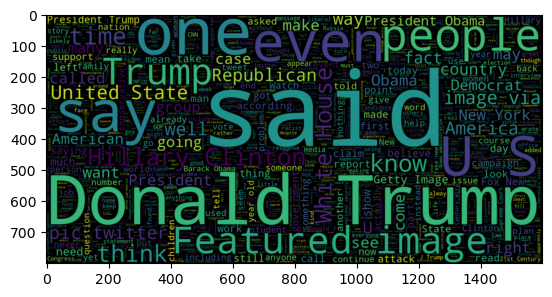

In [30]:
# Word cloud for real and fake text
def plot_wordcloud(category):
    wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(df[df.category == category].clean_text))
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

# Plot word cloud for real text
plot_wordcloud(1)

# Plot word cloud for fake text
plot_wordcloud(0)


## Split the data into training and testing sets


In [35]:
x_train, x_test, y_train, y_test = train_test_split(df.clean_text, df.category, random_state=0)

## Tokenizing text and padding sequences

In [37]:
# max_features = 10000
# maxlen = 300
# tokenizer = text.Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(x_train)
# tokenized_train = tokenizer.texts_to_sequences(x_train)
# x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)
# tokenized_test = tokenizer.texts_to_sequences(x_test)
# x_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [47]:
from tensorflow.keras.preprocessing import text


In [49]:
# Define parameters for tokenization and padding
max_features = 10000  # Maximum number of words to keep in the vocabulary (only the most frequent words)
maxlen = 300  # Maximum sequence length (each text will be truncated or padded to this length)

# Initialize the Tokenizer
tokenizer = text.Tokenizer(num_words=max_features)  # Create a tokenizer that only keeps the top `max_features` words

# Fit the tokenizer on the training text data
tokenizer.fit_on_texts(x_train)  # Learns the mapping of words to unique integer indices based on frequency

# Convert training text data into sequences of integer indices
tokenized_train = tokenizer.texts_to_sequences(x_train)  # Replaces words with their corresponding index from the tokenizer

# Pad the training sequences to ensure uniform length
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)
# If a sequence is shorter than `maxlen`, it is padded with zeros at the beginning.
# If a sequence is longer than `maxlen`, it is truncated.

# Convert testing text data into sequences of integer indices
tokenized_test = tokenizer.texts_to_sequences(x_test)  # Converts test data words to numerical sequences

# Pad the testing sequences to ensure uniform length
x_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)
# Ensures that all test samples have the same sequence length as training samples.

 def get_coefs(word, *arr):
     return word, np.asarray(arr, dtype='float32')

 #Step 11: Load pre-trained GloVe embeddings
 EMBEDDING_FILE = "C:\Users\Lenovo\Desktop\BIA CHD\Deep Learning\True Fake new/glove.twitter.27B.100d.txt"

def load_embeddings(embedding_file, word_index, max_features):
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(embedding_file, encoding='utf-8'))
     all_embs = np.stack(embeddings_index.values())
     emb_mean, emb_std = all_embs.mean(), all_embs.std()
     embed_size = all_embs.shape[1]

     nb_words = min(max_features, len(word_index))
     embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
     for word, i in word_index.items():
         if i >= max_features:
             continue
         embedding_vector = embeddings_index.get(word)
         if embedding_vector is not None:
             embedding_matrix[i] = embedding_vector

     return embedding_matrix, embed_size

 embedding_matrix, embed_size = load_embeddings(EMBEDDING_FILE, tokenizer.word_index, max_features)

In [111]:
import numpy as np

def get_coefs(word, *arr):
    """
    Function to extract word embeddings from a line in the GloVe file.
    - `word`: The actual word in the vocabulary.
    - `*arr`: The corresponding embedding values (vector representation of the word).
    - Returns a tuple: (word, numpy array of embedding values).
    """
    return word, np.asarray(arr, dtype='float32')

# Step 11: Load pre-trained GloVe embeddings
EMBEDDING_FILE = r"C:\Users\Lenovo\Desktop\BIA CHD\Deep Learning\True Fake new\glove.twitter.27B.100d.txt"

def load_embeddings(embedding_file, word_index, max_features):
    """
    Loads pre-trained GloVe embeddings and creates an embedding matrix for the model.

    Parameters:
    - `embedding_file`: Path to the GloVe pre-trained embeddings file.
    - `word_index`: Dictionary mapping words to their tokenized indices.
    - `max_features`: Maximum number of words in the vocabulary.

    Returns:
    - `embedding_matrix`: A numpy matrix where each row corresponds to a word's embedding.
    - `embed_size`: The size (dimensionality) of each word vector.
    """

    # Create a dictionary to store word embeddings
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' '))
                            for o in open(embedding_file, encoding='utf-8'))

    # Convert all embeddings into a NumPy array (Ensure we use a list for np.stack)
    all_embs = np.stack(list(embeddings_index.values()))

    # Compute the mean and standard deviation of the embeddings
    emb_mean, emb_std = all_embs.mean(), all_embs.std()

    # Get the embedding size (100 in this case, since we are using glove.twitter.27B.100d)
    embed_size = all_embs.shape[1]

    # Determine the number of words to consider (limited by max_features)
    nb_words = min(max_features, len(word_index))

    # Initialize embedding matrix with random values (mean and std from pre-trained embeddings)
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

    # Iterate through each word in our vocabulary (word_index dictionary)
    for word, i in word_index.items():
        if i >= max_features:  # Ignore words beyond our max_features limit
            continue

        # Retrieve the pre-trained embedding for the word if it exists
        embedding_vector = embeddings_index.get(word)

        # If the word exists in the pre-trained embeddings, update the corresponding row in the matrix
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix, embed_size

# Create the embedding matrix using the GloVe file and the tokenizer's word index
embedding_matrix, embed_size = load_embeddings(EMBEDDING_FILE, tokenizer.word_index, max_features)


## Model definition and training

In [115]:
# Hyperparameters
batch_size = 256
epochs = 3
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

# Model architecture
model = Sequential()

model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(units=128, return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
model.add(LSTM(units=64, recurrent_dropout=0.1, dropout=0.1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), epochs=epochs, callbacks=[learning_rate_reduction])

Epoch 1/3
132/132 ━━━━━━━━━━━━━━━━━━━━ 2935s 22s/step - accuracy: 0.8348 - loss: 0.3731 - val_accuracy: 0.9459 - val_loss: 0.1621 - learning_rate: 0.0010
Epoch 2/3
132/132 ━━━━━━━━━━━━━━━━━━━━ 2564s 19s/step - accuracy: 0.9448 - loss: 0.1484 - val_accuracy: 0.9742 - val_loss: 0.0770 - learning_rate: 0.0010
Epoch 3/3
132/132 ━━━━━━━━━━━━━━━━━━━━ 2506s 19s/step - accuracy: 0.9533 - loss: 0.1239 - val_accuracy: 0.9808 - val_loss: 0.0616 - learning_rate: 0.0010


In [116]:
# Define training parameters
batch_size = 256  # Number of samples per batch (higher batch size = faster but more memory usage)
epochs = 3  # Number of times the model will go through the entire dataset

# Learning rate reduction strategy
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=2,  # Reduce learning rate if validation accuracy does not improve for 2 consecutive epochs
    verbose=1,  # Print messages when learning rate is reduced
    factor=0.5,  # Reduce learning rate by a factor of 0.5
    min_lr=0.00001  # Lower bound for learning rate
)

# Initialize a Sequential model (feedforward neural network)
model = Sequential()

# Embedding layer (converts words into dense vector representations)
model.add(Embedding(
    input_dim=max_features,  # Vocabulary size (top max_features words)
    output_dim=embed_size,  # Dimension of word embeddings (100 in case of GloVe)
    weights=[embedding_matrix],  # Use pre-trained GloVe embeddings
    input_length=maxlen,  # Input sequence length (fixed to maxlen)
    trainable=False  # Freeze embeddings so they are not updated during training
))

# First LSTM layer
model.add(LSTM(
    units=128,  # Number of LSTM neurons
    return_sequences=True,  # Output sequences to the next LSTM layer
    recurrent_dropout=0.25,  # Dropout applied to recurrent connections (helps prevent overfitting)
    dropout=0.25  # Dropout applied to input connections (helps prevent overfitting)
))

# Second LSTM layer
model.add(LSTM(
    units=64,  # Reduced number of neurons for hierarchical feature extraction
    recurrent_dropout=0.1,  # Slightly lower dropout for recurrent connections
    dropout=0.1  # Slightly lower dropout for input connections
))

# Fully connected dense layer for further feature extraction
model.add(Dense(
    units=32,  # Number of neurons in the dense layer
    activation='relu'  # ReLU activation function for non-linearity
))

# Output layer (binary classification: Fake News (0) vs Real News (1))
model.add(Dense(
    units=1,  # Single neuron (since it's a binary classification problem)
    activation='sigmoid'  # Sigmoid activation outputs probability between 0 and 1
))

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer (efficient and widely used for NLP tasks)
    loss='binary_crossentropy',  # Binary cross-entropy loss function (used for binary classification)
    metrics=['accuracy']  # Track accuracy during training
)

# Train the model
history = model.fit(
    x_train, y_train,  # Training data (features and labels)
    batch_size=batch_size,  # Number of samples per batch
    validation_data=(x_test, y_test),  # Validation set (used to monitor overfitting)
    epochs=epochs,  # Number of training iterations over the dataset
    callbacks=[learning_rate_reduction]  # Apply learning rate reduction if needed
)


Epoch 1/3
132/132 ━━━━━━━━━━━━━━━━━━━━ 2627s 20s/step - accuracy: 0.8328 - loss: 0.3713 - val_accuracy: 0.9619 - val_loss: 0.1125 - learning_rate: 0.0010
Epoch 2/3
132/132 ━━━━━━━━━━━━━━━━━━━━ 2532s 19s/step - accuracy: 0.9439 - loss: 0.1480 - val_accuracy: 0.9760 - val_loss: 0.0698 - learning_rate: 0.0010
Epoch 3/3
132/132 ━━━━━━━━━━━━━━━━━━━━ 2566s 19s/step - accuracy: 0.9525 - loss: 0.1278 - val_accuracy: 0.9425 - val_loss: 0.1650 - learning_rate: 0.0010


## Model evaluation and analysis

In [118]:
print("Accuracy on Training Data:", model.evaluate(x_train, y_train)[1] * 100, "%")
print("Accuracy on Testing Data:", model.evaluate(x_test, y_test)[1] * 100, "%")

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 1161s 1s/step - accuracy: 0.9477 - loss: 0.1505
Accuracy on Training Data: 94.77919936180115 %
351/351 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.9412 - loss: 0.1707
Accuracy on Testing Data: 94.25389766693115 %


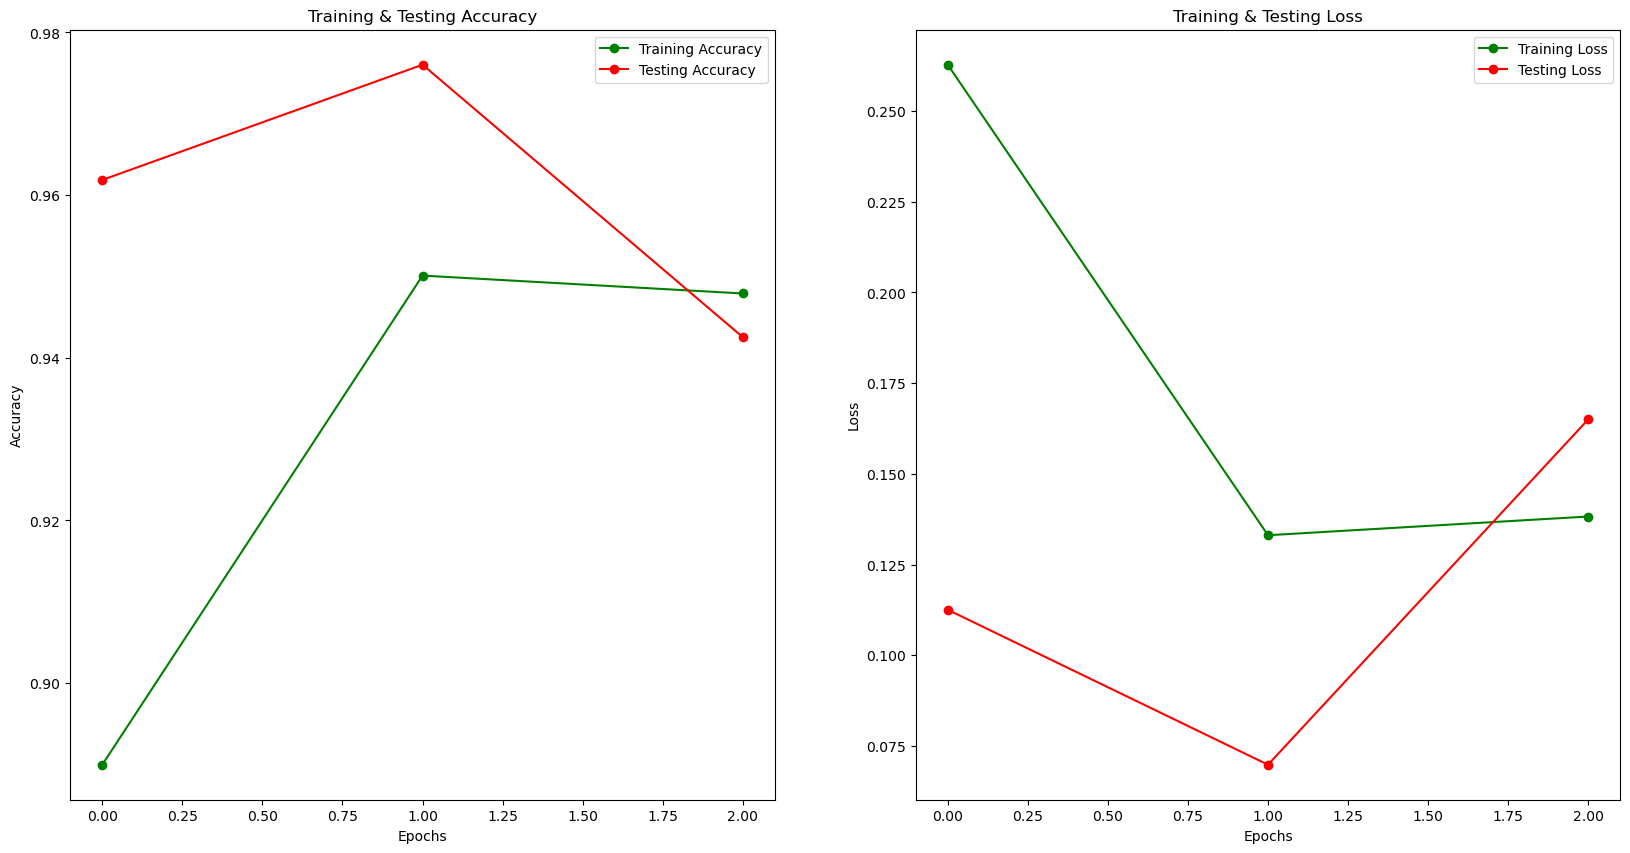

In [119]:
# Get the actual number of epochs from the history object
actual_epochs = len(history.history['accuracy'])

epochs = [i for i in range(actual_epochs)]  # Adjust epochs array based on the actual number of epochs
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label='Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'go-', label='Training Loss')
ax[1].plot(epochs, val_loss, 'ro-', label='Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()